**Importing Necessary Libraries**

In [23]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Datasets**

In [24]:
original_data = pd.read_csv("/content/original_group.csv", sep = ";")
test_data = pd.read_csv("/content/test_group.csv", sep = ";")

**Printing the first few rows of Original data(Control Data)**

In [25]:
print(original_data.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

**Printing the first few rows of Test data**

In [26]:
print(test_data.head())

   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768  


**Data Preparation, Giving New column Names to Data**

In [27]:
original_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks",
                           "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks",
                        "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

**Printing the Original Data has Null Values or not**

In [28]:
print(original_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


**Printing the Test Data has Null Values or not**

In [29]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


**Filling the missing values in the dataset of the control campaign(Original) with the mean value of each column.**

In [30]:
original_data["Number of Impressions"].fillna(value=original_data["Number of Impressions"].mean(),
                                             inplace=True)
original_data["Reach"].fillna(value=original_data["Reach"].mean(),
                             inplace=True)
original_data["Website Clicks"].fillna(value=original_data["Website Clicks"].mean(),
                                      inplace=True)
original_data["Searches Received"].fillna(value=original_data["Searches Received"].mean(),
                                         inplace=True)
original_data["Content Viewed"].fillna(value=original_data["Content Viewed"].mean(),
                                      inplace=True)
original_data["Added to Cart"].fillna(value=original_data["Added to Cart"].mean(),
                                     inplace=True)
original_data["Purchases"].fillna(value=original_data["Purchases"].mean(),
                                 inplace=True)

**Creating a new dataset by merging both the control campaign(Original) and Test campaign Datasets**

In [31]:
numeric_columns = ["Amount Spent", "Number of Impressions", "Reach", "Website Clicks",
                   "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

original_data[numeric_columns] = original_data[numeric_columns].astype(int)
test_data[numeric_columns] = test_data[numeric_columns].astype(int)

new_data = original_data.merge(test_data, how="outer").sort_values(["Date"])
new_data = new_data.reset_index(drop=True)
print(new_data.head())

      Campaign Name        Date  Amount Spent  Number of Impressions  Reach  \
0  Control Campaign   1.08.2019          2280                  82702  56930   
1     Test Campaign   1.08.2019          3008                  39550  35820   
2     Test Campaign  10.08.2019          2790                  95054  79632   
3  Control Campaign  10.08.2019          2149                 117624  91257   
4     Test Campaign  11.08.2019          2420                  83633  71286   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0            7016               2290            2159           1819        618  
1            3038               1946            1069            894        255  
2            8125               2312            1804            424        275  
3            2277               2475            1984           1629        734  
4            3750               2893            2617           1075        668  


In [32]:
print(new_data["Campaign Name"].value_counts())

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64


**Analyzing the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns.**

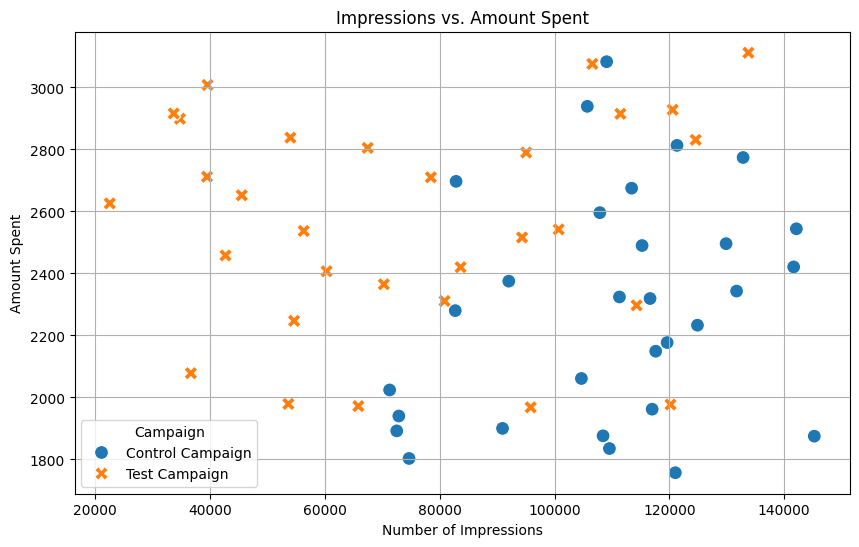

In [33]:
# Scatter plot: Impressions vs. Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x="Number of Impressions", y="Amount Spent", hue="Campaign Name", style="Campaign Name", s=100)
plt.title('Impressions vs. Amount Spent')
plt.xlabel('Number of Impressions')
plt.ylabel('Amount Spent')
plt.legend(title='Campaign')
plt.grid(True)
plt.show()

**By Observing the above plot, We can Understand the control campaign(Original) achieved higher impressions relative to the amount spent compared to the test campaign. This suggests that the control campaign effectively maximized its reach per unit of expenditure, showcasing its efficiency in leveraging marketing resources.**

**Analyzing the Number of searches performed on the website from both campaigns.**

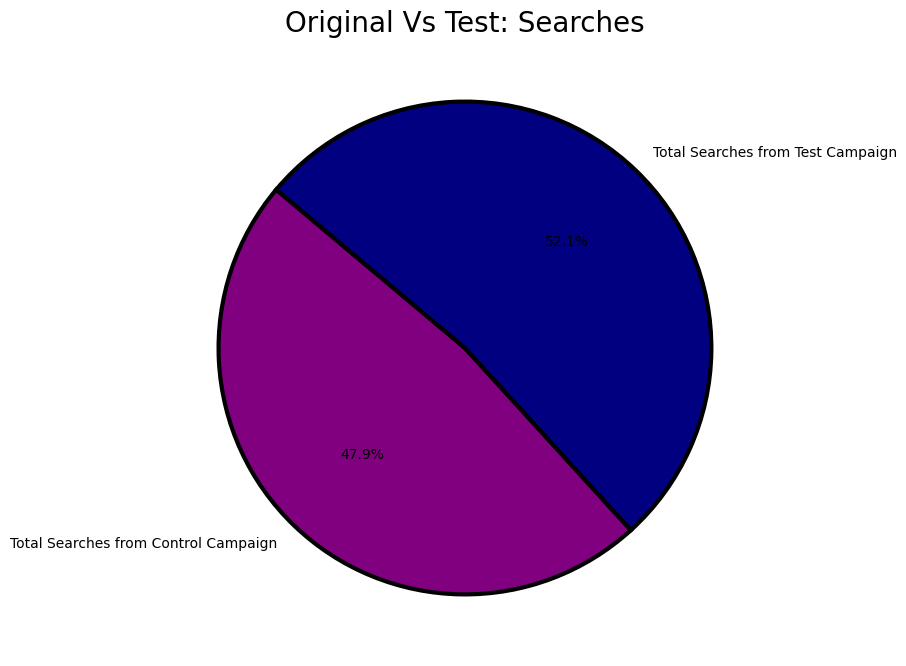

In [34]:
# Data for the pie chart
labels = ["Total Searches from Control Campaign", "Total Searches from Test Campaign"]
counts = [sum(original_data["Searches Received"]), sum(test_data["Searches Received"])]
colors = ['purple', 'navy']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 3})

# Add a title
plt.title('Original Vs Test: Searches', fontsize=20)

# Display the chart
plt.show()

**By Observing the above Pie Chart, We can Understand the test campaign generated more searches on the website, indicating higher user engagement or interest compared to the control campaign.**

**Analyzing the Number of Website Clicks from both campaigns.**

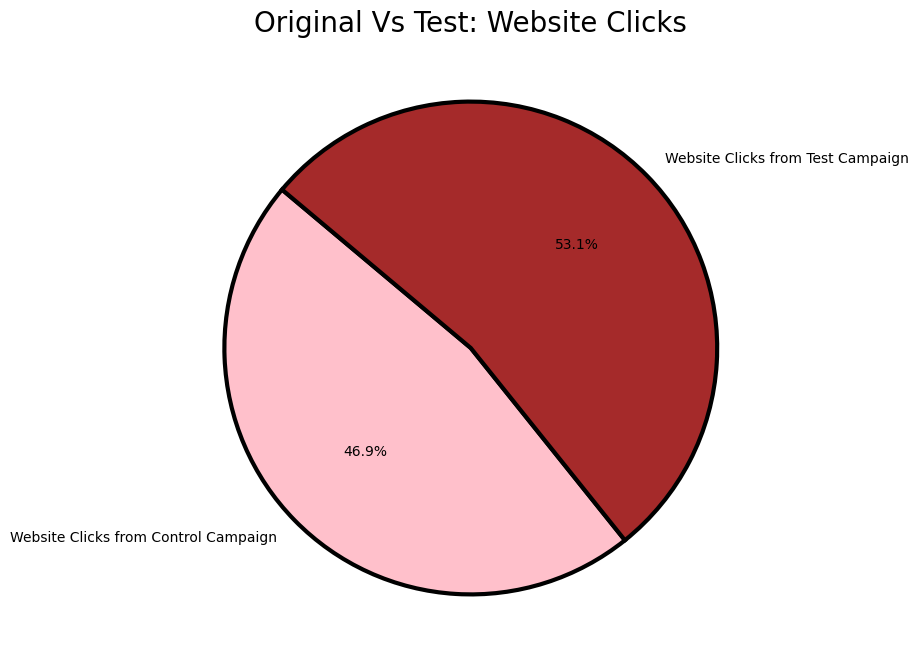

In [35]:
# Data for the pie chart
labels = ["Website Clicks from Control Campaign", "Website Clicks from Test Campaign"]
counts = [sum(original_data["Website Clicks"]), sum(test_data["Website Clicks"])]
colors = ['pink', 'brown']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 3})

# Add a title
plt.title('Original Vs Test: Website Clicks', fontsize=20)

# Display the chart
plt.show()

**By Observing the above Pie Chart, We can Understand the test campaign outperforms in terms of the number of website clicks, indicating higher engagement or interaction compared to the control campaign.**

**Analyzing the amount of content viewed after reaching the website from both campaigns.**

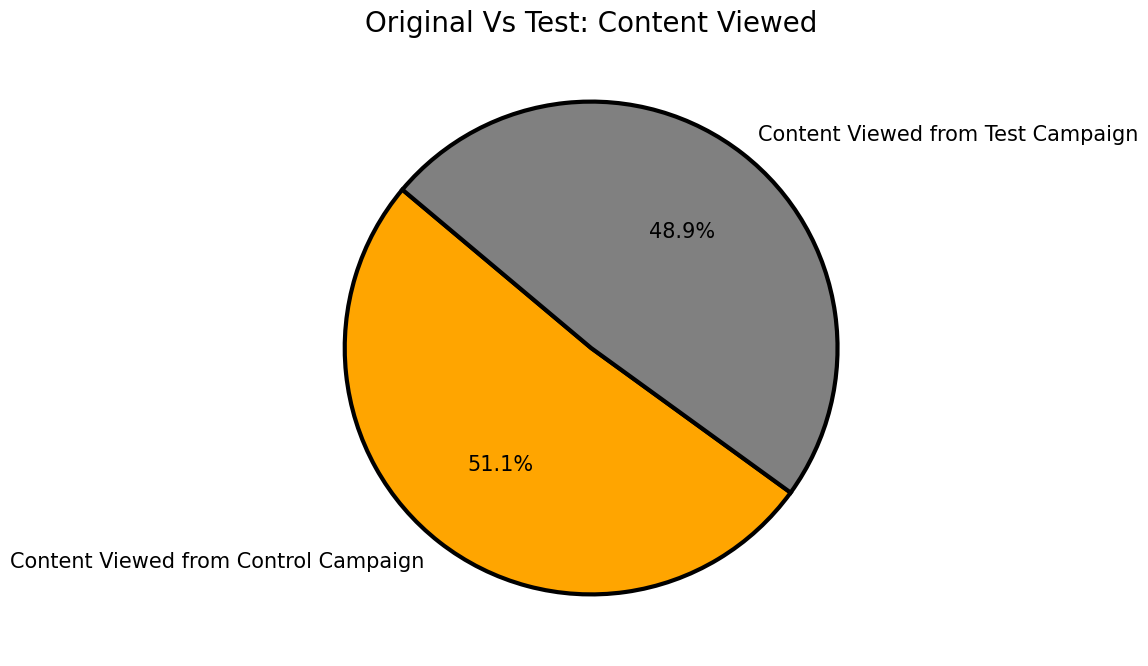

In [36]:
# Data for the pie chart
labels = ["Content Viewed from Control Campaign", "Content Viewed from Test Campaign"]
counts = [sum(original_data["Content Viewed"]), sum(test_data["Content Viewed"])]
colors = ['orange', 'grey']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 3}, textprops={'fontsize': 15})

# Add a title
plt.title('Original Vs Test: Content Viewed', fontsize=20)

# Display the chart
plt.show()

**By Observing the above Pie Chart, We can Understand the audience of the control campaign engaged more with the content compared to the test campaign, despite a minor difference. However, due to lower website clicks in the control campaign, its overall engagement on the website remained higher than that of the test campaign.**

**Analyzing the Number of products added to the cart from both campaigns.**

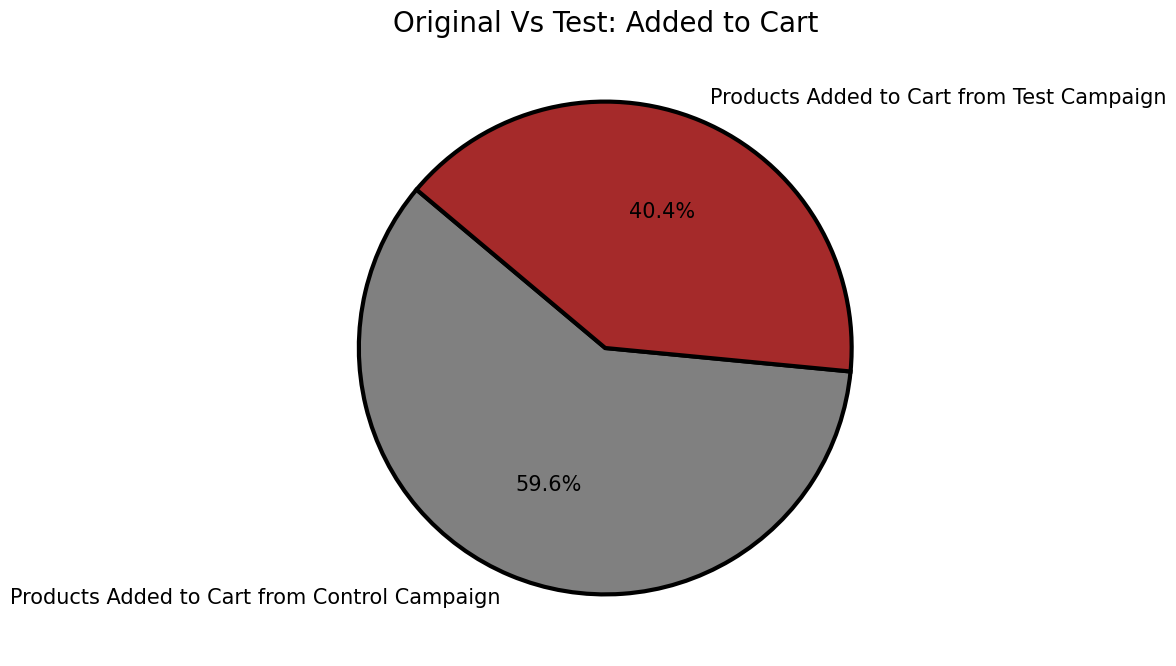

In [37]:
# Data for the pie chart
labels = ["Products Added to Cart from Control Campaign", "Products Added to Cart from Test Campaign"]
counts = [sum(original_data["Added to Cart"]), sum(test_data["Added to Cart"])]
colors = ['grey', 'brown']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 3}, textprops={'fontsize': 15})

# Add a title
plt.title('Original Vs Test: Added to Cart', fontsize=20)

# Display the chart
plt.show()

**By Observing the above Pie Chart, we can understand, Regardless having fewer website clicks, the control campaign managed to achieve a higher number of products added to the cart compared to the test campaign. This suggests that the control campaign was more effective in encouraging users to take action and add items to their carts, despite potentially lower overall traffic or engagement metrics.**

**Analyzing the amount spent on both campaigns.**

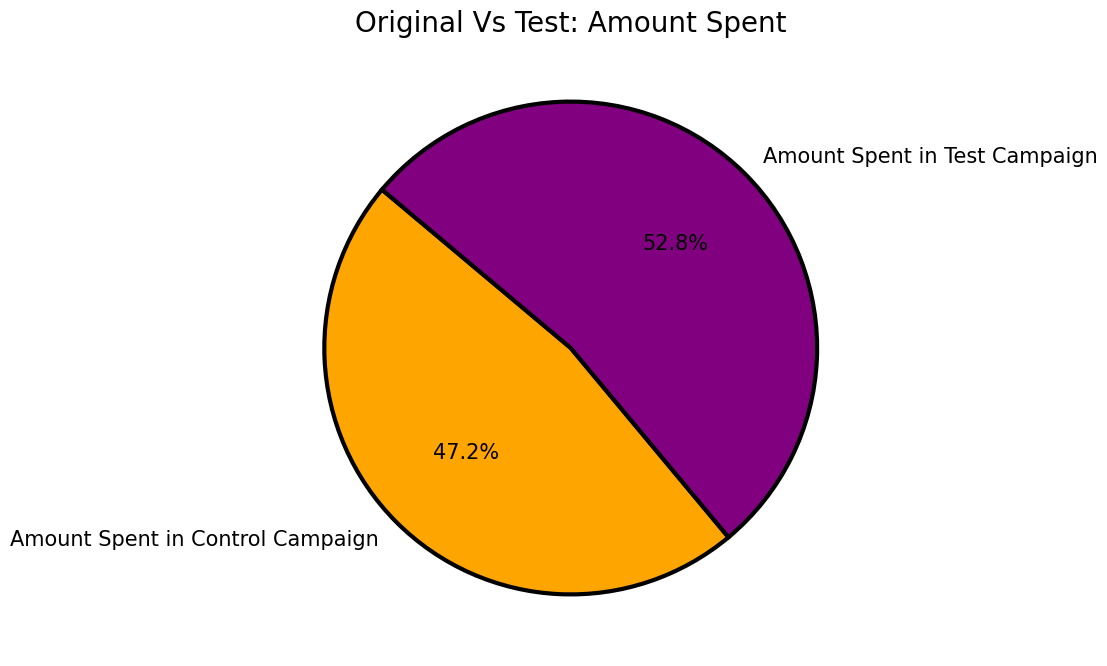

In [38]:
# Data for the pie chart
labels = ["Amount Spent in Control Campaign", "Amount Spent in Test Campaign"]
counts = [sum(original_data["Amount Spent"]), sum(test_data["Amount Spent"])]
colors = ['orange', 'purple']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 3}, textprops={'fontsize': 15})

# Add a title
plt.title('Original Vs Test: Amount Spent', fontsize=20)

# Display the chart
plt.show()

**By Observing the above Pie Chart, we can understand, Although the test campaign has a higher expenditure compared to the control campaign, the latter demonstrates greater efficiency in terms of content views and products added to the cart. This suggests that despite spending less, the control campaign managed to achieve higher engagement and conversions, making it more effective in achieving its objectives compared to the test campaign.**

**Analyzing the purchases made by both campaigns.**

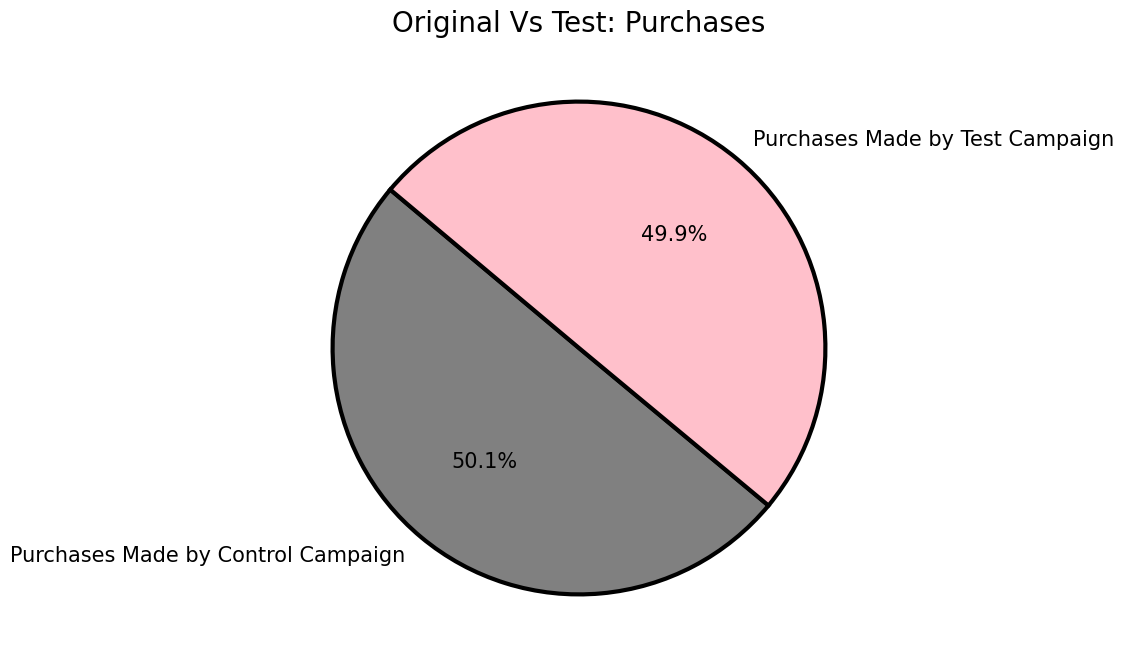

In [39]:
# Data for the pie chart
labels = ["Purchases Made by Control Campaign", "Purchases Made by Test Campaign"]
counts = [sum(original_data["Purchases"]), sum(test_data["Purchases"])]
colors = ['grey', 'pink']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 3}, textprops={'fontsize': 15})

# Add a title
plt.title('Original Vs Test: Purchases', fontsize=20)

# Display the chart
plt.show()

**By Observing the above Pie Chart, we can understand, The difference in purchases between both ad campaigns is minimal, around 1%. Despite this, the control campaign achieved higher sales with a lower marketing expenditure, indicating its superior effectiveness in generating revenue compared to the test campaign. Thus, the control campaign emerges as the more successful strategy in terms of cost-efficiency and sales performance.**

**Analyzing the relationship between the number of website clicks and content viewed from both campaigns.**

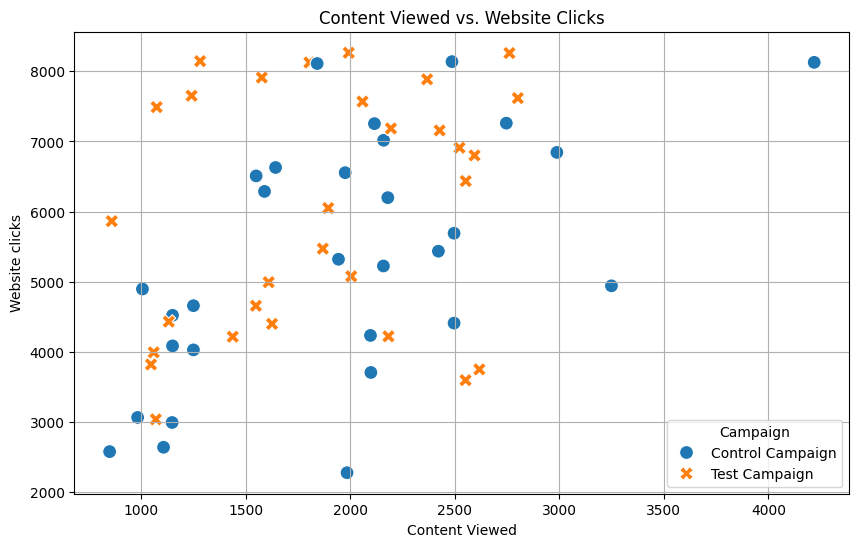

In [40]:
# Scatter plot: Impressions vs. Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x="Content Viewed", y="Website Clicks", hue="Campaign Name", style="Campaign Name", s=100)
plt.title('Content Viewed vs. Website Clicks')
plt.xlabel('Content Viewed')
plt.ylabel('Website clicks')
plt.legend(title='Campaign')
plt.grid(True)
plt.show()

**By Observing the above Plot, We can Understand, While the test campaign recorded higher website clicks, the engagement metrics stemming from these clicks favored the control campaign. This indicates that although the test campaign attracted more initial clicks, the control campaign managed to achieve better user engagement per click. Therefore, in terms of converting clicks into meaningful interaction and engagement, the control campaign emerges as the more effective strategy.**

**Analyzing the relationship between the amount of content viewed and the number of products added to the cart from both campaigns.**

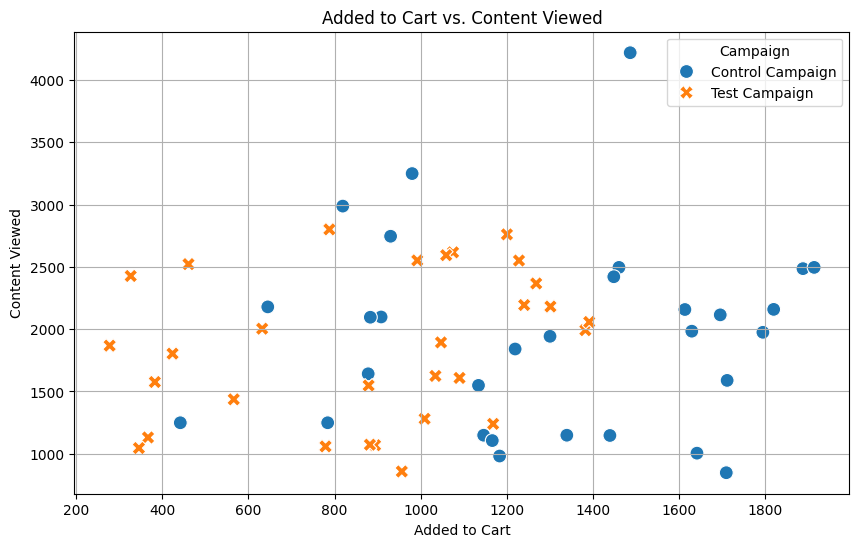

In [41]:
# Scatter plot: Impressions vs. Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x="Added to Cart", y="Content Viewed", hue="Campaign Name", style="Campaign Name", s=100)
plt.title('Added to Cart vs. Content Viewed')
plt.xlabel('Added to Cart')
plt.ylabel('Content Viewed')
plt.legend(title='Campaign')
plt.grid(True)
plt.show()

**By Observing the above Plot, We Can Understand, Once more, the control campaign comes out on top.**

**Analyzing the relationship between the number of products added to the cart and the number of sales from both campaigns.**

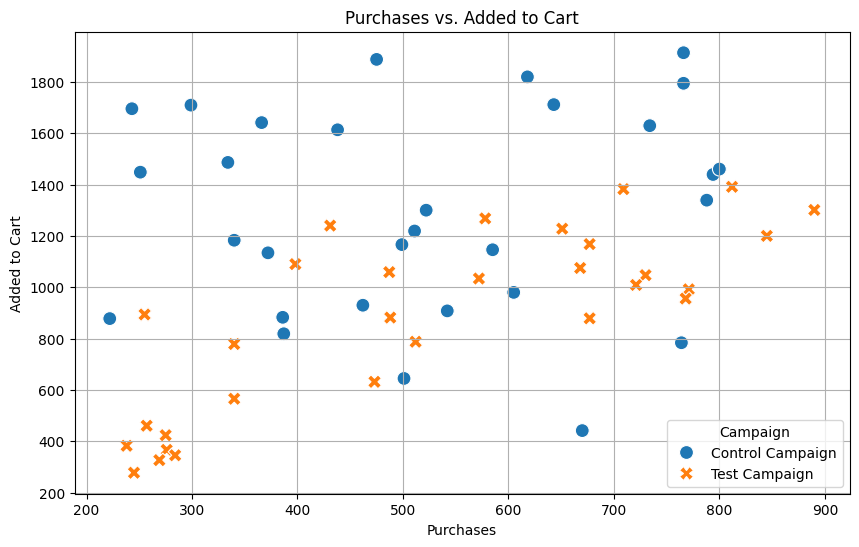

In [42]:
# Scatter plot: Impressions vs. Amount Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x="Purchases", y="Added to Cart", hue="Campaign Name", style="Campaign Name", s=100)
plt.title('Purchases vs. Added to Cart')
plt.xlabel('Purchases')
plt.ylabel('Added to Cart')
plt.legend(title='Campaign')
plt.grid(True)
plt.show()

**By Observing the above Plot, We Can Understand, even though the control campaign generated more sales and added more products to carts, the test campaign had a higher conversion rate.**

**## RESULTS**

**From the A/B tests, we observed that the control campaign generated higher overall sales and visitor engagement. More products were viewed in the control campaign, leading to more items being added to the cart and resulting in greater overall sales. However, the conversion rate of products in the cart was higher in the test campaign. This means that the test campaign was more effective in converting product views and additions to the cart into actual sales.**

**In summary, the control campaign is better suited for promoting multiple products to a broader audience, while the test campaign is more effective for marketing specific products to targeted audiences.**